# Capstone Project - The Battle of Neighborhoods (Week 2)

## Title - Chennai Restaurant Recommander

# 1. Introduction
## 1.1 Background
This final project is to build a better Restaurant Recommender system for Chennai location.
Chennai is the capital city of southern state of India, namely Tamil nadu. Chennai witness thousands of tourists each month and also thousands of visitors for medical purposes from various parts of world and from India. 
Also it is highly populated with workers from other states who were attracted due to high concentration of industries and factories.

## 1.2 Problem
There is a need for these migrant and tourist people to search for restaurants which serves their local food in Chennai. 
Due to vast demographic area in Chennai and it is highly populated, there were large of restaurants in each locality which serves different variety of cuisines. 
So it is very difficult to filter these restaurants and choose correct restaurant based on cuisines and cost of food.
This project is to build an recommender system to identify Restaurants in Chennai. So that it will be easier for people to choose restaurants which are nearby and also priced according to their needs.


# 2. Data Requirements
## 2.1 Data
To build a Restaurant Recommender model for Chennai location, we need below data:
1.	Chennai’s geographical coordinates (latitude and longitude) to find neighborhood details.
2.	Population of the neighborhood where the restaurant is located.
3.	Restaurant details in locality and its cuisines.


Let’s take detail look at each of these:
1.	To access each restaurants in neighborhood location, we need it’s Latitude and Longitude so that we can point at its coordinates and create a map displaying all the restaurants with its labels respectively.
2.	Population of a neighborhood is very important factor to determine a restaurant's growth. More people visit, better the restaurant will be rated because it is accessed by different people with different taste.
3.	Income level of a neighborhood is also very important factor. If people in a neighborhood earns more than an average income, then it is likely that they will spend more. So restaurant can access market demand to income of a neighborhood.


Install geopandas

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 15.3MB/s 
     |████████████████████████████████| 14.7MB 316kB/s 


Import all necessary libraries

In [ ]:
import numpy as np  
import pandas as pd 
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import plotly.graph_objs as go
from wordcloud import WordCloud
import geopandas as gpd

## 2.2 Data Collection
I have used Zomato's Chennai restaurant 2020 details for this project. 
This dataset have list of all restaurants which were served by Zomato delivery team along with location and ratings details.


Zomato dataset have below features:
•	Zomato URL

•	List item

•	Name of Restaurant

•	Address Location

•	Cuisine	Top Dishes

•	Price for 2

•	Dining Rating

•	Dining Rating Count

•	Delivery Rating

•	Delivery Rating Count

•	Features

In [ ]:
df = pd.read_csv('Zomato Chennai Listing 2020.csv')
df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


**Preprocess the Data**


Clean the dataset and impute with NaN values



In [ ]:
df.replace(to_replace = ['None','Invalid','Does not offer Delivery','Does not offer Dining','Not enough Delivery Reviews','Not enough Dining Reviews'], value =np.nan,inplace=True)
df.isnull().sum()

Zomato URL                  0
Name of Restaurant          1
Address                     1
Location                    1
Cuisine                     1
Top Dishes               1629
Price for 2                 1
Dining Rating             385
Dining Rating Count       385
Delivery Rating           749
Delivery Rating Count     749
Features                    1
dtype: int64

Replace feature names with spaces in middle with corresponding short feature names

In [8]:
df['name of restaurant'] = df['Name of Restaurant'].astype(str).apply(lambda x: x.lower())
df['Top Dishes'] = df["Top Dishes"].astype(str)
df['Top Dishes'] = df['Top Dishes'].apply(lambda x:x.replace('[','').replace(']','').replace("'",'').replace('  ','').split(','))
df['Cuisine'] = df["Cuisine"].astype(str)
df['Cuisine'] = df['Cuisine'].apply(lambda x:x.replace('[','').replace(']','').replace("'",'').replace('  ','').split(','))
df['Features'] = df['Features'].astype(str).apply(lambda x:x.replace('[','').replace(']','').replace("'",'').replace('  ','').split(','))
df['Dining Rating Count'] = df['Dining Rating Count'].astype("Float32")
df['Delivery Rating Count'] = df['Delivery Rating Count'].astype("Float32")

Split the location details based on comma

In [10]:
def locsplit(x):
    if len(x.split(','))==2:
        return x.split(',')[1].replace(' ','')
    else:
        return x

df['Location_2'] = df['Location'].astype(str).apply(lambda x: locsplit(x))

Print the count of unique locations

In [11]:
print(len(df['Location'].unique()))
print(len(df['Location_2'].unique()))

237
138


Print all unique locations in Chennai

In [12]:
print(df['Location_2'].unique().tolist())

['Pallavaram', 'Alandur', 'Kodambakkam', 'Perambur', 'Medavakkam', 'Navallur', 'Anna Nagar East', 'T. Nagar', 'Velachery', 'Vadapalani', 'Porur', 'Kilpauk', 'Purasavakkam', 'Ashok Nagar', 'Chetpet', 'Aminijikarai', 'Ramapuram', 'Mylapore', 'Thuraipakkam', 'RA Puram', 'Alwarpet', 'Mogappair', 'West Mambalam', 'Adyar', 'Nungambakkam', 'Royapettah', 'Chromepet', 'Kolathur', 'Valasaravakkam', 'Guindy', 'Potheri', 'Egmore', 'Madipakkam', 'Thiruvanmiyur', 'Saligramam', 'Sholinganallur', 'Perungudi', 'Besant Nagar', 'Kotturpuram', 'Semmancheri', 'Royapuram', 'Anna Nagar West', 'Grand by GRT Hotels', 'Ambattur', 'Thousand Lights', 'Kanathur', 'Washermenpet', 'Selaiyur', 'Old Mahabalipuram Road (OMR)', 'Choolaimedu', 'Abhiramapuram', 'Triplicane', 'Poonamalle', 'Gopalapuram', 'East Coast Road (ECR)', 'Kandanchavadi', 'Palavakkam', 'BesantNagar', 'Neelangarai', 'GST Road', 'MRC Nagar', 'T.Nagar', 'RKSalai(CathedralRoad)', 'EastCoastRoad(ECR)', 'Somerset Greenways', 'Mahabalipuram', 'Foodies Kitc

In [13]:
feature_list = [feat.lower() for feats in df['Features'].tolist() for feat in feats]
print(len(set(feature_list)))
print(list(set(feature_list)))

96
[' lunch menu', ' table booking recommended', ' luxury dining', ' smoking area', 'table reservation required', ' board games', ' pool table', ' members only', ' serves alcohol', ' brunch', ' poolside', ' serves cocktails', 'wine and beer', ' nightlife', ' full bar available', ' byob', ' card upon delivery', ' seaview', ' wifi', 'home delivery', ' restricted entry', ' karaoke', 'free parking', ' resto bar', 'wine', ' entry fee', ' private dining area available', ' bulk orders accepted', ' home delivery', 'breakfast', ' serves jain food', ' disabled friendly', ' desserts and bakes', ' gluten free options', 'serves alcohol', 'home baker', ' seaside', 'desserts and bakes', 'mall parking', ' wine', ' table booking for groups', 'wheelchair accessible', ' egg preparations', ' free parking', 'delivery only', ' home baker', ' 4/5 star', ' vegetarian only', 'valet parking available', ' catering available', 'nan', ' all day breakfast', ' table reservation required', ' sugar free options', ' wh

Display the Bar chart for Chennai Restaurants - Location wise

In [14]:
fig = go.Figure(data=[go.Bar(
                x = df['Location_2'].value_counts()[:20].index.tolist(),
                y = df['Location_2'].value_counts()[:20].values.tolist())])

fig.show()

Display the names for *Restaurants* Franchise Details

In [15]:
df['name of restaurant'].value_counts()[:25]

chennai rawther restaurant      4
hotel pandian                   4
courtallam border parotta       3
zawaj biriyani                  3
sri krishna bhavan              3
rahman biriyani                 3
street foods by punjab grill    3
tea break                       2
cake my day                     2
salem rr restaurant             2
fb cakes n sweets               2
kollywood briyani               2
sree gupta bhavan               2
devamirthas                     2
al taj                          2
the red box                     2
mughal biriyani                 2
tarbouche                       2
kolkata chat                    2
7th heaven                      2
mr. sandwich                    2
andhra ruchulu                  2
oceana                          2
hotel sri lakshmi sagar         2
amul ice cream                  2
Name: name of restaurant, dtype: int64

Display the chart for Rating Distribution Location wise


Dine only Ratings

In [17]:
bins_r = [0,2.5,4,5]
group_r = ['bad','good','best']
df['Dining Rating'] = df['Dining Rating'].astype(float)
df['Dine_Verdict'] = pd.cut(df['Dining Rating'],bins_r,labels=group_r)
yv = df['Dine_Verdict'].value_counts().tolist()
colors = ['blue','green','red']
fig = go.Figure(data=[go.Bar(x=group_r,y=yv,marker_color=colors)])
fig.show()

Display the chart for Ratings Location wise

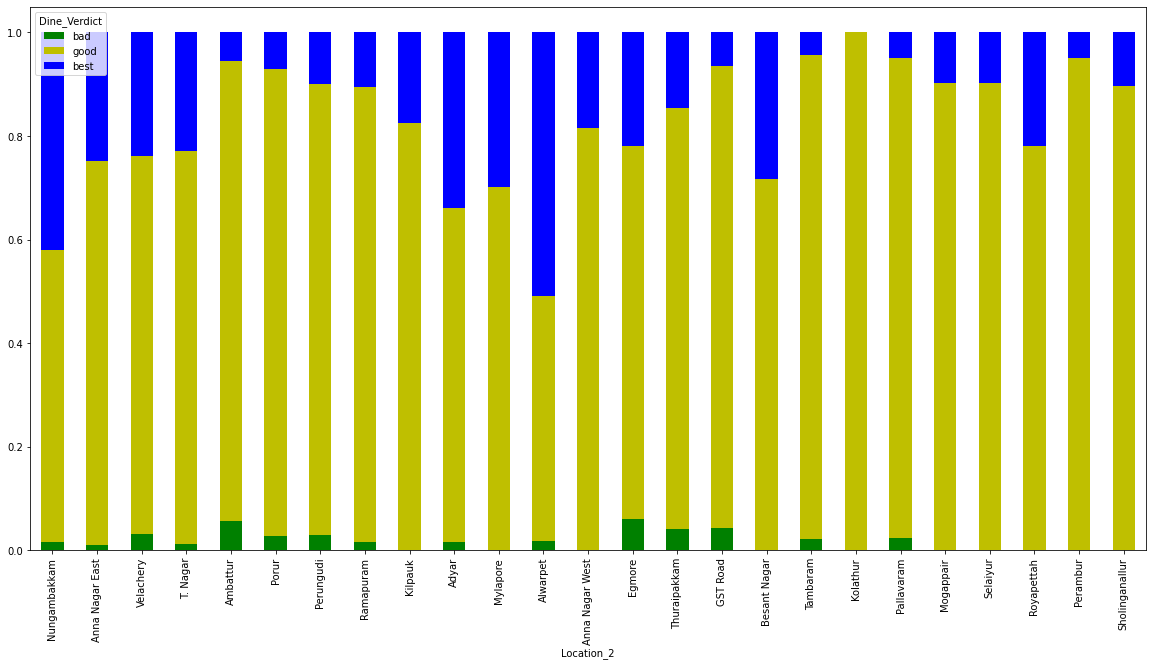

In [18]:
loc_price2 = pd.crosstab(df['Location_2'],df['Dine_Verdict'],margins=True,margins_name='Total') 
loc_price3 = loc_price2.sort_values('Total',ascending=False)[1:26]
loc_price3.drop(columns=['Total'],inplace=True)
loc_price3.div(loc_price3.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(20, 10),color = ['g','y','b','r'])

Display the chart for Delivery only Rating

In [19]:
bins_r = [0,3.5,4,5]
group_r = ['bad','good','best']
df['Delivery Rating'] = df['Delivery Rating'].astype(float)
df['Delivery_Verdict'] = pd.cut(df['Delivery Rating'],bins_r,labels=group_r)
yv = df['Delivery_Verdict'].value_counts().tolist()
colors = ['blue','green','red']
fig = go.Figure(data=[go.Bar(x=group_r,y=yv,marker_color=colors)])
fig.show()

Display the chart for Ratings Location wise for Delivery

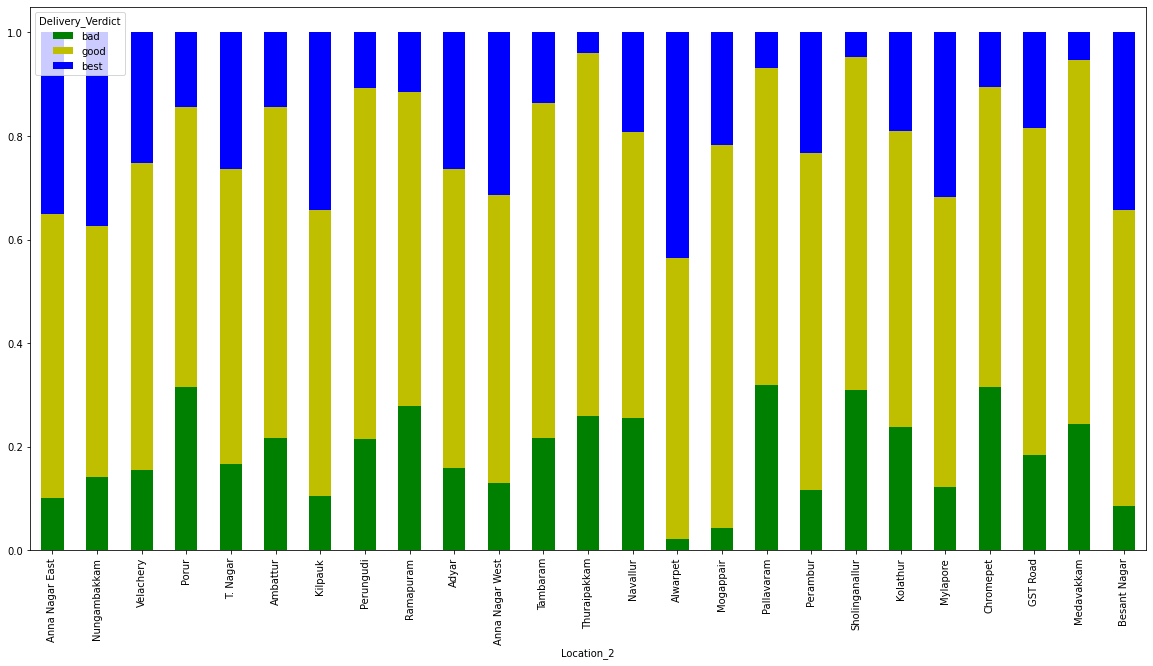

In [20]:
loc_price4 = pd.crosstab(df['Location_2'],df['Delivery_Verdict'],margins=True,margins_name='Total') 
loc_price5 = loc_price4.sort_values('Total',ascending=False)[1:26]
loc_price5.drop(columns=['Total'],inplace=True)
loc_price5.div(loc_price5.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(20, 10),color = ['g','y','b','r'])

Display the chart for Price Comparision Location wise

In [21]:
bins = [0,500,1000,2500,float("inf")]
groups = ['cheap','moderate','pricey','expensive']
df['Cost'] = pd.cut(df['Price for 2'], bins,labels=groups)
yc = df['Cost'].value_counts().tolist()
colors = ['green','orange','blue','red']
fig = go.Figure(data=[go.Bar(x=groups,y=yc,marker_color=colors)])
fig.show()

Display the chart for Price - Location wise for Delivery

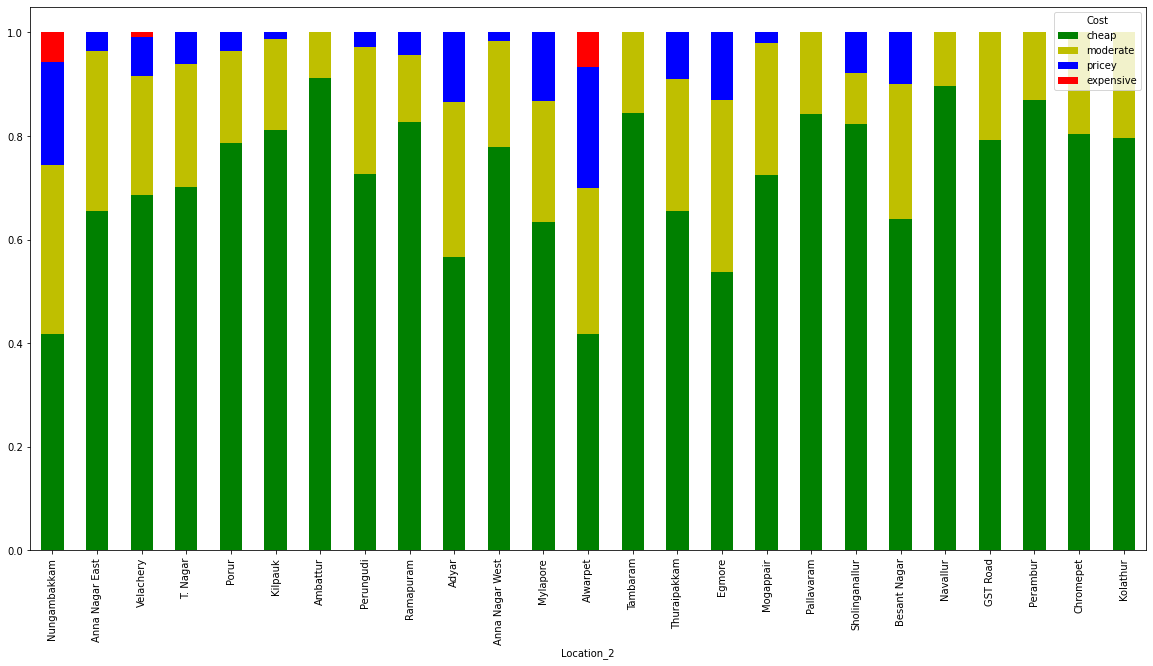

In [22]:
loc_price0 = pd.crosstab(df['Location_2'],df['Cost'],margins=True,margins_name='Total') 
loc_price1 = loc_price0.sort_values('Total',ascending=False)[1:26]
loc_price1.drop(columns=['Total'],inplace=True)
loc_price1.div(loc_price1.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(20, 10),color = ['g','y','b','r'])

Display the word cloud for Top Dishes in Chennai

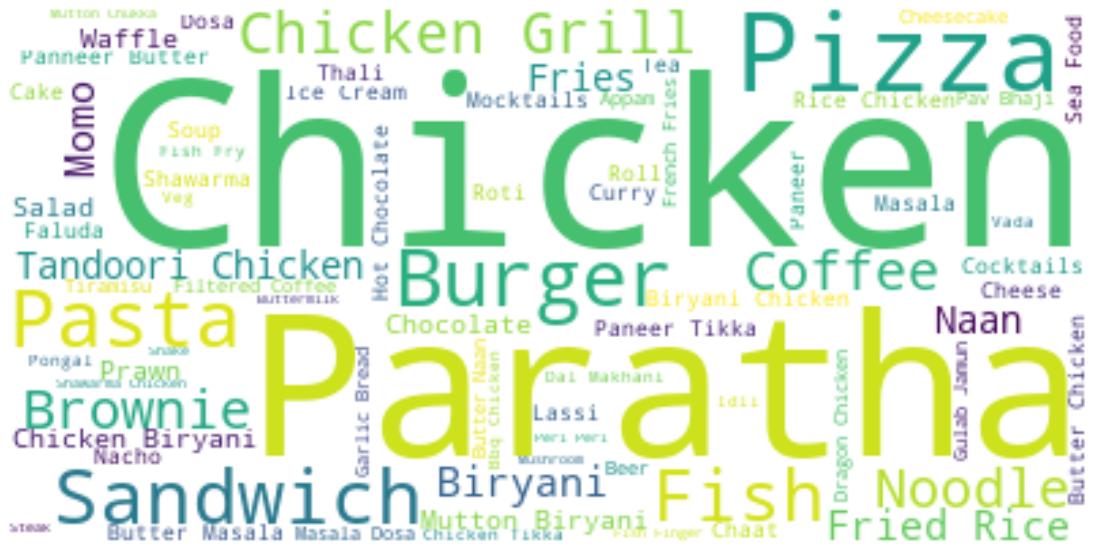

In [23]:
dishes = ' '.join(dish for dish_list in df['Top Dishes'].tolist() for dish in dish_list if dish != np.nan)
wordcloud = WordCloud(background_color='white',stopwords=['nan']).generate(dishes)
figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Display the word cloud for Popular Cuisines served in Chennai



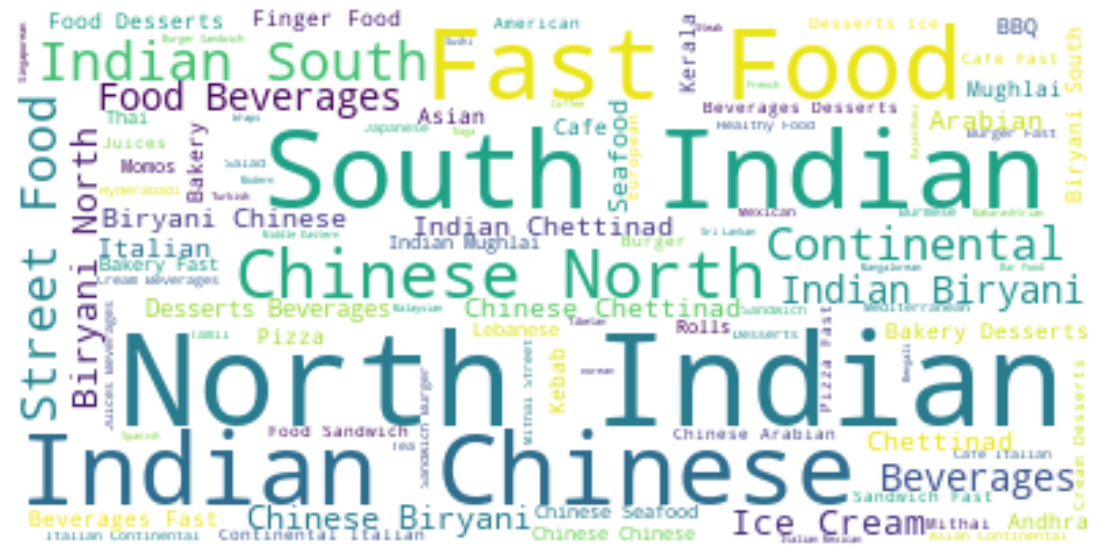

In [24]:
cuisines = ' '.join(dish for dish_list in df['Cuisine'].tolist() for dish in dish_list if dish != 'Invalid')
wordcloud = WordCloud(background_color='white').generate(cuisines)
figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Derive status for Vegetarian Food in Chennai

In [25]:
def veg_status(feat_list):
    if 'Vegetarian Only' in feat_list:
        return 'Yes'
    elif ' Vegetarian Only' in feat_list:
        return 'Yes'
    else:
        return 'No'

In [26]:
df['Vegetarian Status'] = df['Features'].apply(lambda x: veg_status(x))
df['Vegetarian Status'].value_counts()

No     2618
Yes     572
Name: Vegetarian Status, dtype: int64

Display bar chart for Vegetarian restaurants in Chennai

In [27]:
fig = go.Figure(data=[go.Bar(
                x = df.loc[df['Vegetarian Status'] == 'Yes']['name of restaurant'].value_counts()[:10].index.tolist(),
                y = df.loc[df['Vegetarian Status'] == 'Yes']['name of restaurant'].value_counts()[:10].values.tolist())])

fig.show()

Display the bar chart for Locations with maximum Vegetarian Restaurants

In [28]:
fig = go.Figure(data=[go.Bar(
                x = df.loc[df['Vegetarian Status'] == 'Yes']['Location'].value_counts()[:10].index.tolist(),
                y = df.loc[df['Vegetarian Status'] == 'Yes']['Location'].value_counts()[:10].values.tolist())])

fig.show()

### Result Summary

Most Popular Restaurants in Chennai

In [29]:
df.loc[df['Dining Rating Count'].nlargest(10).index][['Name of Restaurant','Location_2','Dining Rating Count','Delivery Rating Count']]

,Name of Restaurant,Location_2,Dining Rating Count,Delivery Rating Count
89,Coal Barbecues,Velachery,9410.0,NaN
74,Onesta,Semmancheri,5407.0,4375.0
1,Sukkubhai Biriyani,Alandur,3059.0,39200.0
75,Fusilli Reasons,Kilpauk,3042.0,3954.0
101,Pind,Velachery,2994.0,1896.0
172,Animal Kingdom,Adyar,2733.0,200.0
210,Osteria By That Madras Place,Adyar,2591.0,1264.0
8,Savoury Sea Shell,Anna Nagar East,2564.0,21700.0
173,Bombay Brasserie,Nungambakkam,2546.0,1006.0
171,Grill Box - Unlimited BBQ,Mylapore,2492.0,NaN


Explore Chennai Neighbourhood using Foursquare API

In [30]:
CLIENT_SECRET = '4W1QOJNNNXQXTONMW3RIFXJ54VKC2HFPEB0RX0LKE0J4XBDC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 100 # define radius

In [31]:
def getNearbyVenues(names, districts, cities, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, district, city, lat, lng in zip(names, districts, cities, latitudes, longitudes):
        print('Processing City: {}, District: {}, Neighborhood: {}'.format(city, district, name))
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            district,
            city,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'District',
                             'City',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [ ]:
venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                         districts = neighborhoods['District'],
                         cities = neighborhoods['City'],
                         latitudes=neighborhoods['Latitude'],
                         longitudes=neighborhoods['Longitude'])